In [1]:
tx_id = 'NM_001032386.2'
protein_id = 'NP_001027558.1'

In [2]:
from genophenocorr.model.genome import GRCh38
from genophenocorr.preprocessing import VVTranscriptCoordinateService

txc_service = VVTranscriptCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(tx_id)

In [3]:
from genophenocorr.preprocessing import UniprotProteinMetadataService

pms = UniprotProteinMetadataService()

protein_metas = pms.annotate(protein_id)

assert len(protein_metas) == 1
protein_meta = protein_metas[0]

In [4]:
import hpotk
import os
from genophenocorr.preprocessing import load_phenopacket_folder
from genophenocorr.preprocessing import configure_caching_patient_creator
from hpotk.validate import ValidationRunner
from hpotk.validate import ObsoleteTermIdsValidator, PhenotypicAbnormalityValidator, AnnotationPropagationValidator

fpath_hpo = 'https://github.com/obophenotype/human-phenotype-ontology/releases/download/v2023-10-09/hp.json'
hpo = hpotk.load_minimal_ontology(fpath_hpo)

validation_runner = ValidationRunner(
    validators=(
        ObsoleteTermIdsValidator(hpo),
        PhenotypicAbnormalityValidator(hpo),
        AnnotationPropagationValidator(hpo)
    ))

pc = configure_caching_patient_creator(hpo, validation_runner=validation_runner)

fpath_suox_cohort = os.path.join(os.getcwd(), os.pardir, 'notebooks', 'SUOX', 'phenopackets')
cohort = load_phenopacket_folder(fpath_suox_cohort, pc)
f'Loaded {len(cohort)} samples'

Patients Created: 100%|██████████| 35/35 [00:00<00:00, 730.76it/s]


'Loaded 35 samples'

0.2108695652173913 0.26999287241625086 0.059123307198859554
0.2729864575908767 0.2797220242337847 0.006735566642908031
0.2804704205274412 0.449607982893799 0.1691375623663578
0.4503563791874554 0.5521382751247327 0.10178189593727727


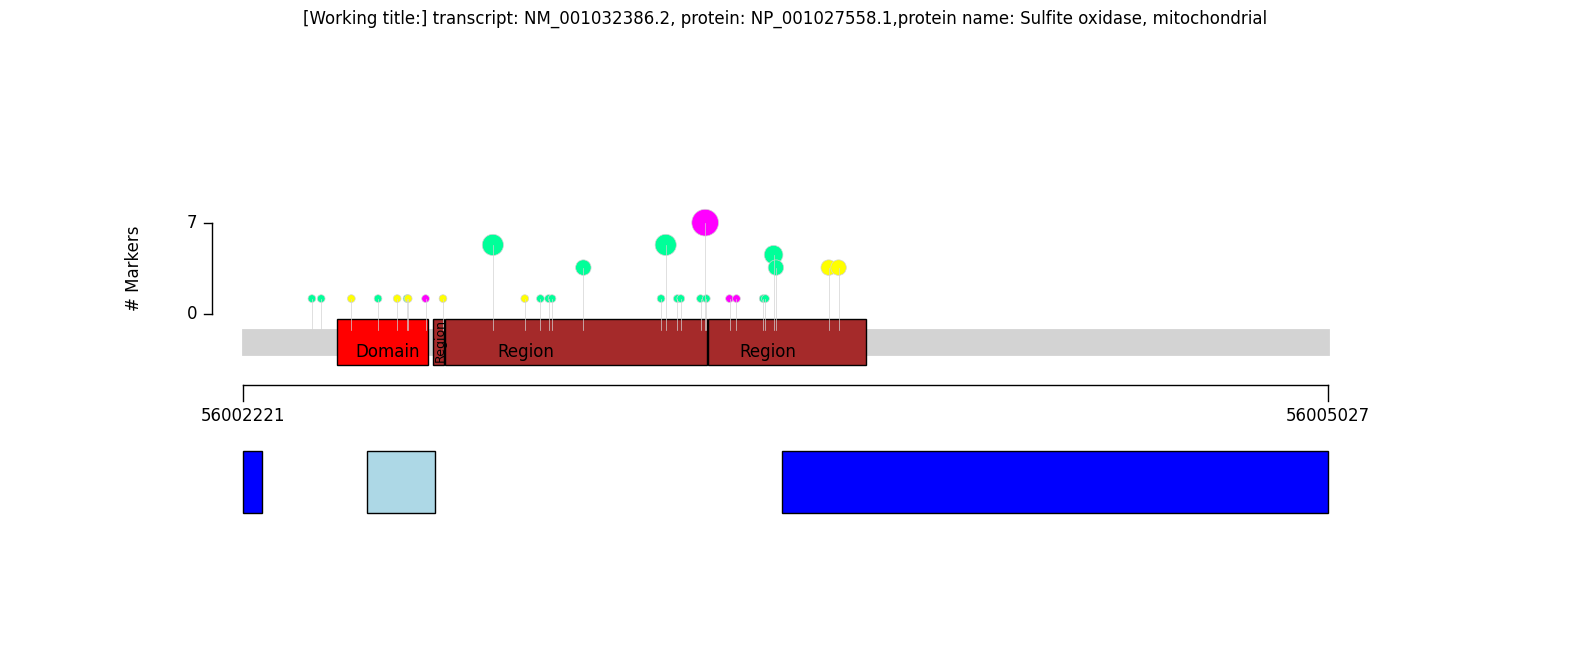

In [5]:
from genophenocorr.view._draw_variants import VariantsVisualizer
viz = VariantsVisualizer()
viz.draw_fig(tx_coordinates, protein_meta, cohort)